In [1]:
# Importando bibliotecas

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, TimeoutException, NoSuchElementException
import time
import pandas as pd
from openpyxl import Workbook
from folium import plugins
import folium
import requests

# Web Scraping - Hospitais

In [2]:
lista_hospitais = [
    'INST DO CANCER DO ESTADO DE SAO PAULO',
    'INST DO CORACAO - INCOR - HC/FMUSP',
    'INSTITUTO DO CANCER ARNALDO VIEIRA DE CARVALHO',
    'SANTA CASA DE SAO PAULO'
]

In [9]:
endereco_hospital = []
telefone_hospital = []
horario_hospital = []
nome_completo_hospital = []
sem_endereco_hospital = []
hospital_nome = []
link_hospitais = []

def obter_endereco_hospital(hospital):
    driver = webdriver.Chrome()
    driver.get(f"https://www.google.com.br/search?q={hospital}")
    time.sleep(5)
    
    #Endereço
    try:
        endereco = driver.find_element(By.CLASS_NAME, 'LrzXr')
        endereco_hospital.append(endereco.text)
        hospital_nome.append(hospital)
    except NoSuchElementException as e:
        endereco_hospital.append("n/a")
        sem_endereco_hospital.append(hospital)
        hospital_nome.append("n/a")
    
    #Telefone
    try:
        telefone = driver.find_element(By.CSS_SELECTOR, '#kp-wp-tab-overview > div.TzHB6b.cLjAic.LMRCfc > div > div > div > div > div > div:nth-child(8) > div > div > div > span:nth-child(2)')
        telefone_hospital.append(telefone.text)
    except NoSuchElementException as e:
        telefone_hospital.append("n/a")
        
    #Horario
    try:
        horario = driver.find_element(By.CSS_SELECTOR, '#kp-wp-tab-overview > div.TzHB6b.cLjAic.LMRCfc > div > div > div > div > div > div:nth-child(6) > div > div > div.bJpcZ > div.vk_bk.h-n > span > span > span > span')
        horario_hospital.append(horario.text)
    except NoSuchElementException as e:
        horario_hospital.append("n/a")
     
    #Nome_Completo
    try:
        nome = driver.find_element(By.CSS_SELECTOR,'#kp-wp-tab-overview > div:nth-child(8) > div > div > div > div > div > div > div:nth-child(11) > div > div > div > div > span:nth-child(2) > span')
        nome_completo_hospital.append(nome.text)
    except NoSuchElementException as e:
        nome_completo_hospital.append("n/a")
    #Links (Mais Infos_
    url = driver.current_url
    link_hospitais.append(url)

    driver.quit()

In [10]:
# Itera sobre a lista de hospitais
for hospital in lista_hospitais:
    obter_endereco_hospital(hospital)

WebDriverException: Message: Service C:\ProgramData\chocolatey\bin\chromedriver.EXE unexpectedly exited. Status code was: 4294967295


In [5]:
print("Nomes Hospitais:")
for nome_hospital in hospital_nome:
    print(nome_hospital)

Nomes Hospitais:
INST DO CANCER DO ESTADO DE SAO PAULO
INST DO CORACAO - INCOR - HC/FMUSP
INSTITUTO DO CANCER ARNALDO VIEIRA DE CARVALHO
n/a


In [6]:
print("Endereço dos hospitais:")
for endereco in endereco_hospital:
    print(endereco)

Endereço dos hospitais:
Av. Dr. Arnaldo, 251 - Cerqueira César, São Paulo - SP, 01246-000
Av. Dr. Enéas Carvalho de Aguiar, 44 - Cerqueira César, São Paulo - SP, 05403-900
R. Dr. Cesário Mota Júnior, 112 - Vila Buarque, São Paulo - SP, 01221-020
n/a


In [7]:
print("Telefones dos hospitais:")
for telefone in telefone_hospital:
    print(telefone)

Telefones dos hospitais:
(11) 3893-2000
n/a
(11) 3350-7088
n/a


In [8]:
print("Horários dos hospitais:")
for horario in horario_hospital:
    print(horario)

Horários dos hospitais:
Aberto 24 horas
Aberto 24 horas
Aberto 24 horas
n/a


In [9]:
print("Links para mais Infos:")
for link in link_hospitais:
    print(link)

Links para mais Infos:
https://www.google.com.br/search?q=INST%20DO%20CANCER%20DO%20ESTADO%20DE%20SAO%20PAULO
https://www.google.com.br/search?q=INST%20DO%20CORACAO%20-%20INCOR%20-%20HC/FMUSP
https://www.google.com.br/search?q=INSTITUTO%20DO%20CANCER%20ARNALDO%20VIEIRA%20DE%20CARVALHO
https://www.google.com.br/search?q=SANTA%20CASA%20DE%20SAO%20PAULO


In [10]:
sem_endereco_hospital

['SANTA CASA DE SAO PAULO']

In [11]:
df_hospitais = pd.DataFrame({
    'Nome_Hospital': hospital_nome,
    'Endereco': endereco_hospital,
    'Telefone': telefone_hospital,
    'Horario': horario_hospital,
    'Link_+Infos': link_hospitais
})
df_hospitais

,Nome_Hospital,Endereco,Telefone,Horario,Link_+Infos
0,INST DO CANCER DO ESTADO DE SAO PAULO,"Av. Dr. Arnaldo, 251 - Cerqueira César, São Pa...",(11) 3893-2000,Aberto 24 horas,https://www.google.com.br/search?q=INST%20DO%2...
1,INST DO CORACAO - INCOR - HC/FMUSP,"Av. Dr. Enéas Carvalho de Aguiar, 44 - Cerquei...",n/a,Aberto 24 horas,https://www.google.com.br/search?q=INST%20DO%2...
2,INSTITUTO DO CANCER ARNALDO VIEIRA DE CARVALHO,"R. Dr. Cesário Mota Júnior, 112 - Vila Buarque...",(11) 3350-7088,Aberto 24 horas,https://www.google.com.br/search?q=INSTITUTO%2...
3,n/a,n/a,n/a,n/a,https://www.google.com.br/search?q=SANTA%20CAS...


In [12]:
workbook = Workbook()
sheet = workbook.active
sheet.title = "Informacoes_Hospitais"

# Adicionar cabeçalhos
sheet.append(['Endereço', 'Telefone', 'Horário', 'Link_+Infos'])

# Adicionar informações
for endereco, telefone, horario, nome_completo in zip(endereco_hospital, telefone_hospital, horario_hospital, nome_completo_hospital):
    sheet.append([endereco, telefone, horario, nome_completo])

# Salvar a planilha
workbook.save("/Users/viniperez/Downloads/informacoes_hospitais.xlsx")
print("Informações dos hospitais salvas no arquivo 'informacoes_hospitais.xlsx'")

Informações dos hospitais salvas no arquivo 'informacoes_hospitais.xlsx'


# Pegar localização do hosptais

In [15]:
# Substitua "SUA_CHAVE_DE_API" pelo seu próprio chave de API do OpenCage Geocoding
api_key = "c74811d72ca942aab042634058318311"

# Lista de nomes de hospitais
hospitais = df_hospitais["Endereco"].to_list()
list_nao_encontrado = []
lista_longitude = []
lista_latitude = []

# Loop através da lista de hospitais
for hospital_name in hospitais:
    # Construa a consulta com o nome do hospital
    query = hospital_name

    # Construa a URL da API
    url = f"https://api.opencagedata.com/geocode/v1/json?q={query}&key={api_key}"

    # Faça a solicitação à API
    response = requests.get(url)

    # Verifique se a solicitação foi bem-sucedida
    if response.status_code == 200:
        data = response.json()
        # Extraia as coordenadas de latitude e longitude a partir dos resultados
        if len(data["results"]) > 0:
            latitude = data["results"][0]["geometry"]["lat"]
            lista_latitude.append(latitude)
            longitude = data["results"][0]["geometry"]["lng"]
            lista_longitude.append(longitude)
            print(f"Hospital: {hospital_name}, Latitude: {latitude}, Longitude: {longitude}")
        else:
            lista_latitude.append(0)
            lista_longitude.append(0)
            print(hospital_name)
            list_nao_encontrado.append(hospital_name)
    else:
        print(f"Erro na solicitação à API para o hospital {hospital_name}")

# Adiciona as listas de latitude e longitude ao DataFrame
df_hospitais["Latitude"] = lista_latitude
df_hospitais["Longitude"] = lista_longitude

Hospital: Av. Dr. Arnaldo, 251 - Cerqueira César, São Paulo - SP, 01246-000, Latitude: -23.5561305, Longitude: -46.6681716
Hospital: Av. Dr. Enéas Carvalho de Aguiar, 44 - Cerqueira César, São Paulo - SP, 05403-900, Latitude: -23.5568592, Longitude: -46.6689355
Hospital: R. Dr. Cesário Mota Júnior, 112 - Vila Buarque, São Paulo - SP, 01221-020, Latitude: -23.5427214, Longitude: -46.6502345
Hospital: n/a, Latitude: 51.5668742, Longitude: 4.9285039


In [16]:
df_hospitais = df_hospitais[df_hospitais['Nome_Hospital'] != 'n/a']
df_hospitais

,Nome_Hospital,Endereco,Telefone,Horario,Link_+Infos,Latitude,Longitude
0,INST DO CANCER DO ESTADO DE SAO PAULO,"Av. Dr. Arnaldo, 251 - Cerqueira César, São Pa...",(11) 3893-2000,Aberto 24 horas,https://www.google.com.br/search?q=INST%20DO%2...,-23.556130,-46.668172
1,INST DO CORACAO - INCOR - HC/FMUSP,"Av. Dr. Enéas Carvalho de Aguiar, 44 - Cerquei...",n/a,Aberto 24 horas,https://www.google.com.br/search?q=INST%20DO%2...,-23.556859,-46.668936
2,INSTITUTO DO CANCER ARNALDO VIEIRA DE CARVALHO,"R. Dr. Cesário Mota Júnior, 112 - Vila Buarque...",(11) 3350-7088,Aberto 24 horas,https://www.google.com.br/search?q=INSTITUTO%2...,-23.542721,-46.650235


# Plotar no mapa


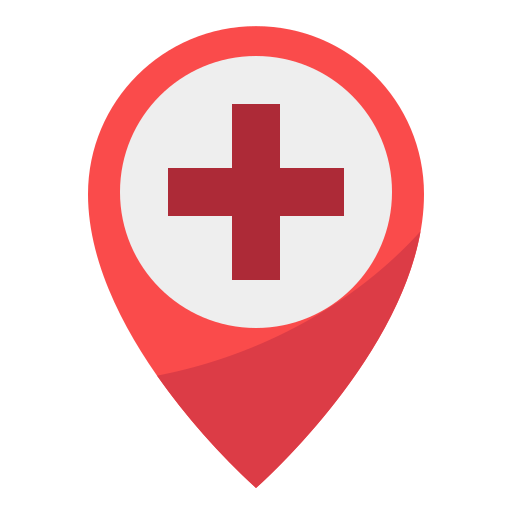
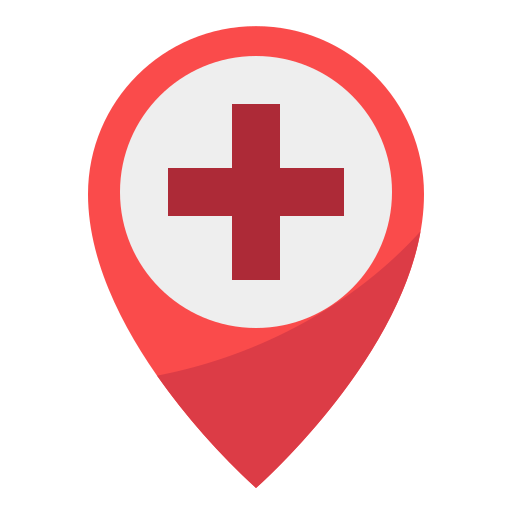
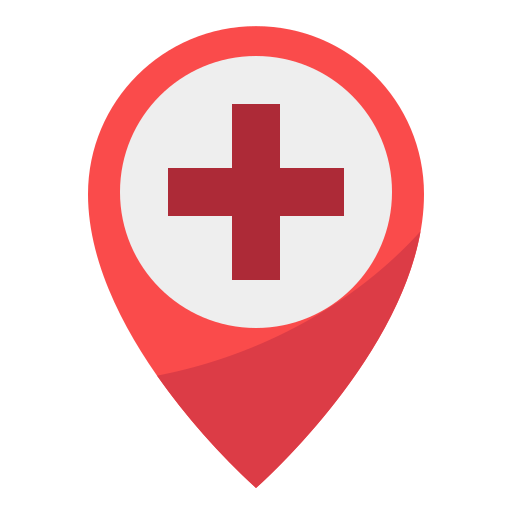
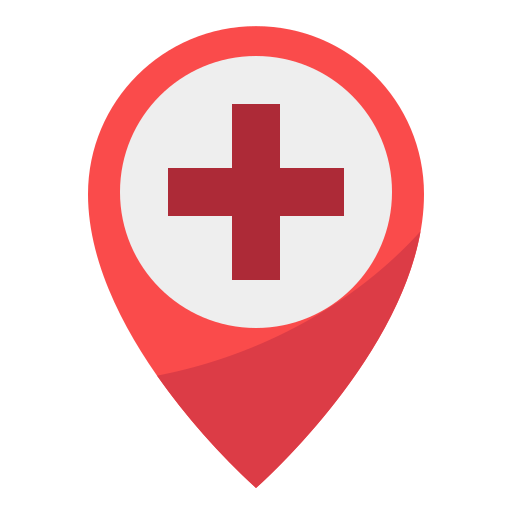
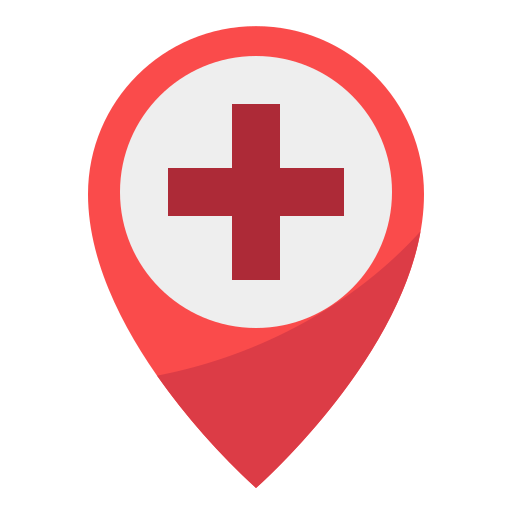
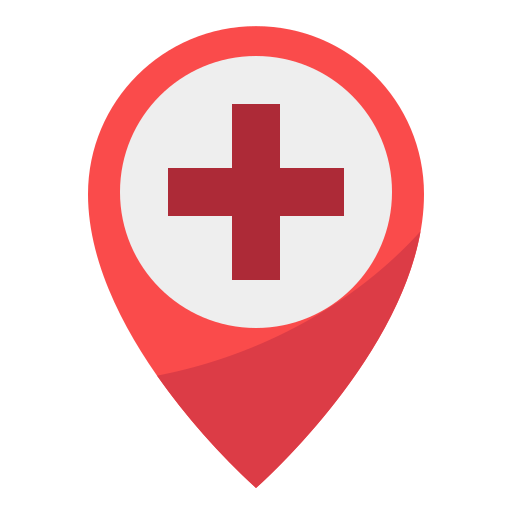

In [19]:
for index, row in df_hospitais.iterrows():
    # Cria o conteúdo da popup com informações adicionais e link clicável
    popup_content = f"<b>{row['Nome_Hospital']}</b><br>" \
                    f"Endereço: {row['Endereco']}<br>" \
                    f"Telefone: {row['Telefone']}<br>" \
                    f"Horário: {row['Horario']}<br>" \
                    f"Link para + Infos: <a href='{row['Link_+Infos']}' target='_blank'>Clique aqui</a>"

    icon = folium.CustomIcon(icon_image='/Users/viniperez/Downloads/3448513.png',
                             icon_size=(50, 50),
                             icon_anchor=(14, 50))

    # Adiciona o marcador com a popup personalizada
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=folium.Popup(popup_content, max_width=300),  # Define uma largura máxima para a popup
                  icon=icon).add_to(mapa)

# Exibe o mapa diretamente no Jupyter Notebook
mapa